# Final Project Submission

* Student name:                                 MOSES MUSYOKI
* Student pace:                                 part time 
* Scheduled project review date/time: 
* Instructor name:                              DANIEL EKALE/SAMUEL KARU
* Blog post URL:


# Movies Analysis

## Project Overview
The project aims to provide actionable insights to guide the organizations new movie studio in making decisions on which films to produce by identifying successful genres, and key factors such as budget, cast, and vote average.


The project's primary audience includes the Head of the Movie Studio, the Creative Development Team, and the Marketing Team. These teams will use these insights to inform long-term planning and content creation.


Key questions to be explored include the relationship between genre and box office revenue, the impact of budgets and reviews on performance, and the influence of actors, directors, and release timing.

## Business Problem
My company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I are charged with exploring what types of films are currently doing the best at the box office. My findings will provide actionable insights to the head of my company's new movie studio.

## Data Understanding
This project aims to analyze the current movie landscape using datasets from sources like 
[Box Office Mojo](https://github.com/ntoitichristine/The-Movies-Analysis-Project/blob/main/zippedData/bom.movie_gross.csv.gz)
 ,[IMDb](https://github.com/ntoitichristine/The-Movies-Analysis-Project/blob/main/zippedData/im.db.zip),
 [Rotten Tomatoes](https://github.com/ntoitichristine/The-Movies-Analysis-Project/blob/main/zippedData/rt.movie_info.tsv.gz), [The MovieDB](https://github.com/ntoitichristine/The-Movies-Analysis-Project/blob/main/zippedData/tmdb.movies.csv.gz) and [The Numbers](https://github.com/ntoitichristine/The-Movies-Analysis-Project/blob/main/zippedData/tmdb.movie_budgets.csv.gz)  to uncover trends and patterns in the types of films that perform well at the box office.

In [1]:
#imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## Movie gross

In [2]:
movie_gross = pd.read_csv("../data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movie_gross.shape

(3387, 5)

In [4]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
movie_gross_clean = movie_gross.dropna()
movie_gross_clean.shape

(2007, 5)

In [7]:
movie_gross_clean.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
len(movie_gross_clean['studio'].unique())

172

In [9]:
movie_gross_clean.duplicated().sum()

0

## Movie info

In [10]:
movie_info = pd.read_csv("../data/rt.movie_info.tsv", sep="\t")
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [13]:
movies_information = movie_info.drop(['theater_date', 'dvd_date', 'currency', 'box_office', 'studio'], axis=1)
movies_information.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'runtime'], dtype='object')

In [14]:
movies_information.isna().sum()

id            0
synopsis     62
rating        3
genre         8
director    199
writer      449
runtime      30
dtype: int64

In [15]:
movies_information = movies_information.dropna()
movies_information.shape

(1021, 7)

In [16]:
movies_information.head(3)

,id,synopsis,rating,genre,director,writer,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes


In [17]:
movies_information.duplicated().sum()

0

In [18]:
movies_information['genre'] = movies_information['genre'].str.replace(' and ', '|')
movies_information['genre'] = movies_information['genre'].str.split('|')
movies_information = movies_information.explode('genre').reset_index(drop=True)
print(movies_information.shape)
print(movies_information.head(3))

(3201, 7)
   id                                           synopsis rating      genre  \
0   1  This gritty, fast-paced, and innovative police...      R     Action   
1   1  This gritty, fast-paced, and innovative police...      R  Adventure   
2   1  This gritty, fast-paced, and innovative police...      R   Classics   

           director          writer      runtime  
0  William Friedkin  Ernest Tidyman  104 minutes  
1  William Friedkin  Ernest Tidyman  104 minutes  
2  William Friedkin  Ernest Tidyman  104 minutes  


## Reviews

In [19]:
reviews = pd.read_csv("../data/rt.reviews.tsv", sep="\t", encoding="latin1")
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
reviews.shape

(54432, 8)

In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [22]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [23]:
reviews = reviews.dropna()
reviews.shape

(33988, 8)

In [24]:
reviews.duplicated().sum()

0

## Movies

In [25]:
movies = pd.read_csv("../data/tmdb.movies.csv", index_col=0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
movies.shape

(26517, 9)

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [28]:
movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [29]:
movies.duplicated().sum()

1020

In [30]:
movies = movies.drop_duplicates()
movies.shape

(25497, 9)

## Movie budgets

In [31]:
movie_budgets = pd.read_csv("../data/tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
movie_budgets.shape

(5782, 6)

In [33]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [34]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [35]:
movie_budgets.duplicated().sum()

0

In [36]:
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)
movie_budgets.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## Merging the datasets

In [37]:
df_movies = movie_gross_clean.merge(movies, on='title', how='inner')
df_movies.shape

(1576, 13)

In [38]:
df_movies.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [39]:
df_movies.head()

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [40]:
df_movies = df_movies.merge(movie_budgets, on="title", how='inner')
df_movies.shape

(1094, 18)

In [41]:
df_movies.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"


In [42]:
# drop columns
cols_to_drop = ['id_x', 'original_language', 'id_y', 'release_date_y', 'domestic_gross_y']
df_movies.drop(columns=cols_to_drop, axis=1, inplace=True)
df_movies.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'genre_ids', 'original_title', 'popularity', 'release_date_x',
       'vote_average', 'vote_count', 'production_budget', 'worldwide_gross'],
      dtype='object')

In [43]:
df_movies['production_budget'] = df_movies['production_budget'].str.strip('$').str.replace(',', '').astype('int64')
df_movies['worldwide_gross'] = df_movies['worldwide_gross'].str.strip('$').str.replace(',', '').astype('int64')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1094 non-null   object 
 1   studio             1094 non-null   object 
 2   domestic_gross_x   1094 non-null   float64
 3   foreign_gross      1094 non-null   object 
 4   year               1094 non-null   int64  
 5   genre_ids          1094 non-null   object 
 6   original_title     1094 non-null   object 
 7   popularity         1094 non-null   float64
 8   release_date_x     1094 non-null   object 
 9   vote_average       1094 non-null   float64
 10  vote_count         1094 non-null   int64  
 11  production_budget  1094 non-null   int64  
 12  worldwide_gross    1094 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 119.7+ KB


In [44]:
# create profit column 
df_movies['profit'] = df_movies['worldwide_gross'] - df_movies['production_budget']
df_movies.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_title,popularity,release_date_x,vote_average,vote_count,production_budget,worldwide_gross,profit
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,675524642


In [45]:
import ast

genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western",
    # TV Show-specific genres
    10759: "Action & Adventure",
    10762: "Kids",
    10763: "News",
    10764: "Reality",
    10765: "Sci-Fi & Fantasy",
    10766: "Soap",
    10767: "Talk",
    10768: "War & Politics"
}

# Function to convert a list of genre IDs to genre names
def ids_to_names(genre_ids_str):
    # Convert the string representation of a list to an actual list of integers
    genre_ids = ast.literal_eval(genre_ids_str)
    # Map each genre ID to its name using the genre_map dictionary
    return [genre_map[genre_id] for genre_id in genre_ids if genre_id in genre_map]

# Apply the function to the 'genre_ids' column
df_movies['genre_names'] = df_movies['genre_ids'].apply(ids_to_names)

df_movies.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_title,popularity,release_date_x,vote_average,vote_count,production_budget,worldwide_gross,profit,genre_names
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522,"[Animation, Family, Comedy]"
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,675524642,"[Action, Science Fiction, Adventure]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",Shrek Forever After,15.041,2010-05-16,6.1,3843,165000000,756244673,591244673,"[Comedy, Adventure, Fantasy, Animation, Family]"


In [46]:
#convert release date to datetime object
df_movies['release_date_x'] = pd.to_datetime(df_movies['release_date_x'])
# new colums for year and month
df_movies['release_year'] = df_movies['release_date_x'].dt.year
df_movies['release_month'] = df_movies['release_date_x'].dt.month_name()

df_movies.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_title,popularity,release_date_x,vote_average,vote_count,production_budget,worldwide_gross,profit,genre_names,release_year,release_month
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522,"[Animation, Family, Comedy]",2010,June
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,675524642,"[Action, Science Fiction, Adventure]",2010,July


In [47]:
# separate the genre names
df_movies = df_movies.explode('genre_names')
df_movies.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_title,popularity,release_date_x,vote_average,vote_count,production_budget,worldwide_gross,profit,genre_names,release_year,release_month
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522,Animation,2010,June
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522,Family,2010,June
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522,Comedy,2010,June


## Distributions

In [48]:
# check for distributions
# fig = px.histogram(df_movies, x="production_budget", nbins=8)
# fig.show()

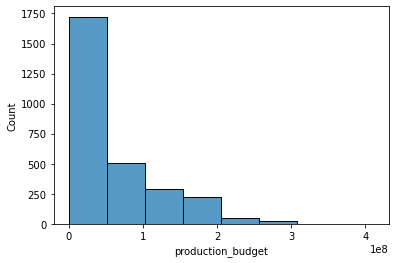

In [49]:
fig, ax = plt.subplots()
sns.histplot(data=df_movies, x="production_budget", bins=8);

In [50]:
# fig = px.histogram(df_movies, x="worldwide_gross", nbins=10,
#                    labels={'worldwide_gross':'worldwide gross'})
# fig.show()

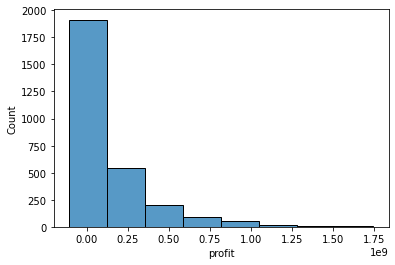

In [51]:
fig, ax = plt.subplots()
sns.histplot(data=df_movies, x="profit", bins=8);

In [52]:
# fig = px.histogram(df_movies, x="popularity", nbins=7)
# fig.show()

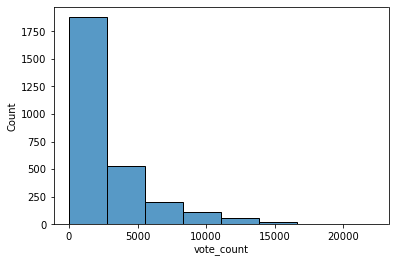

In [53]:
fig, ax = plt.subplots()
sns.histplot(data=df_movies, x="vote_count", bins=8);

In [54]:
# # box plots
# fig = px.box(df_movies, y="production_budget")
# fig.show()

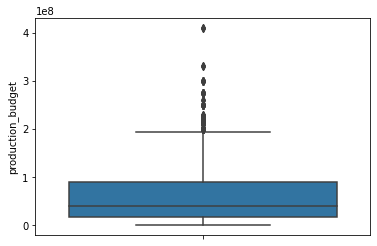

In [55]:
fig, ax = plt.subplots()
sns.boxplot(data=df_movies, y="production_budget");

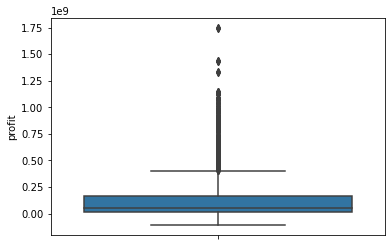

In [56]:
fig, ax = plt.subplots()
sns.boxplot(data=df_movies, y="profit");

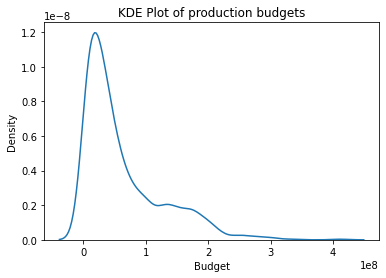

In [57]:
# kde plot
sns.kdeplot(df_movies['production_budget'])
plt.xlabel('Budget')
plt.ylabel('Density')
plt.title('KDE Plot of production budgets');

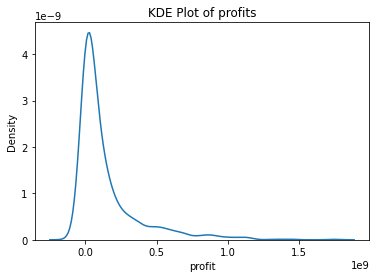

In [58]:
# kde plot
sns.kdeplot(df_movies['profit'])
plt.xlabel('profit')
plt.ylabel('Density')
plt.title('KDE Plot of profits');

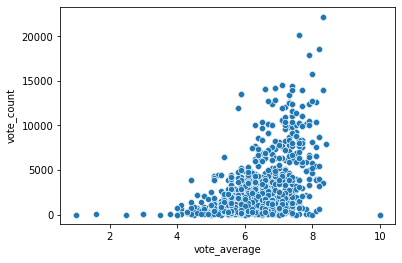

In [59]:
#Vote Count vs. Vote Average: Scatter plot to explore the relationship between vote count and vote average
sns.scatterplot(data=df_movies, x='vote_average', y='vote_count');

In [60]:
# analysis of genre by profits
genre_analysis = df_movies.groupby("genre_names").agg({"profit":"mean"}).reset_index()
genre_analysis

,genre_names,profit
0,Action,2.063929e+08
1,Adventure,2.802919e+08
2,Animation,3.173931e+08
3,Comedy,1.198858e+08
4,Crime,8.601860e+07
5,Documentary,6.496175e+07
6,Drama,6.912191e+07
7,Family,2.231059e+08
8,Fantasy,2.296640e+08
9,History,4.504453e+07


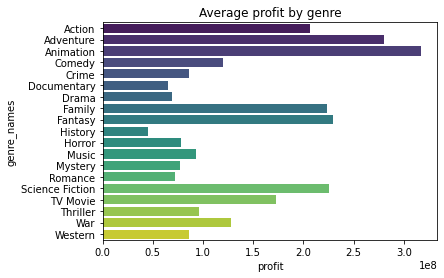

In [61]:
fig, ax = plt.subplots()
sns.barplot(x='profit', y='genre_names', data=genre_analysis, palette='viridis')
plt.title("Average profit by genre");

In [62]:
monthly_profits = df_movies.groupby('release_month')['profit'].mean().reset_index()
monthly_profits

,release_month,profit
0,April,1.384838e+08
1,August,9.156593e+07
2,December,1.463137e+08
3,February,1.204306e+08
4,January,6.437663e+07
5,July,2.174507e+08
6,June,2.621819e+08
7,March,1.095126e+08
8,May,2.242483e+08
9,November,1.729361e+08


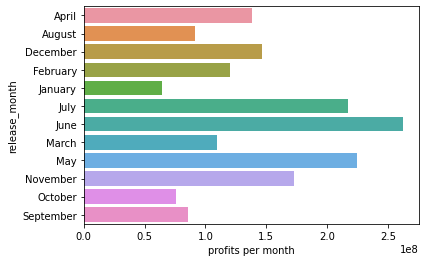

In [63]:
fig, ax = plt.subplots()

sns.barplot(data=monthly_profits, x='profit', y='release_month' )
plt.xlabel("profits per month");

June has the highest profits followed by May and July. It seems movies released in these months have higher returns compared to other months. 

In [64]:
genre_by_month = df_movies.groupby(['genre_names', 'release_month'])['worldwide_gross'].mean().unstack()

genre_by_month.fillna(0, inplace=True)
genre_by_month

release_month,April,August,December,February,January,July,June,March,May,November,October,September
genre_names,,,,,,,,,,,,
Action,4.006987e+08,1.898213e+08,4.077163e+08,1.993642e+08,1.676628e+08,3.403157e+08,4.128137e+08,2.282858e+08,5.119751e+08,3.738293e+08,1.598508e+08,1.754683e+08
Adventure,3.423052e+08,2.220379e+08,4.206377e+08,2.545786e+08,1.500362e+08,4.534696e+08,6.120877e+08,3.255290e+08,5.709538e+08,5.247890e+08,1.657422e+08,1.919954e+08
Animation,3.416506e+08,9.729587e+07,2.501835e+08,1.918904e+08,4.791188e+08,5.739628e+08,7.291259e+08,4.051070e+08,5.090511e+08,4.279796e+08,3.180691e+08,2.530152e+08
Comedy,1.179057e+08,9.260479e+07,1.638311e+08,1.421902e+08,9.148234e+07,2.506599e+08,2.566999e+08,1.438991e+08,2.012598e+08,2.009392e+08,8.369451e+07,1.120703e+08
Crime,2.627787e+08,1.212613e+08,1.313440e+08,1.164213e+08,6.723532e+07,1.603261e+08,1.515039e+08,7.721231e+07,1.493458e+08,1.408940e+08,8.302937e+07,1.218279e+08
Documentary,6.064197e+07,0.000000e+00,0.000000e+00,9.903412e+07,0.000000e+00,3.081259e+07,0.000000e+00,3.528311e+08,1.651520e+07,2.744527e+08,3.986062e+06,1.657209e+08
Drama,6.805321e+07,8.583605e+07,1.162498e+08,1.331985e+08,4.813171e+07,2.168663e+08,1.251276e+08,6.592566e+07,9.773094e+07,1.192435e+08,9.535035e+07,7.506864e+07
Family,1.537884e+08,9.489434e+07,2.780142e+08,2.006174e+08,1.832825e+08,4.227311e+08,6.033206e+08,2.600185e+08,4.230827e+08,3.511948e+08,1.676077e+08,2.138889e+08
Fantasy,4.146895e+08,2.049956e+08,3.564454e+08,3.520707e+08,7.776696e+07,3.351215e+08,4.538206e+08,2.733129e+08,4.682229e+08,3.980999e+08,1.493218e+08,3.051373e+08


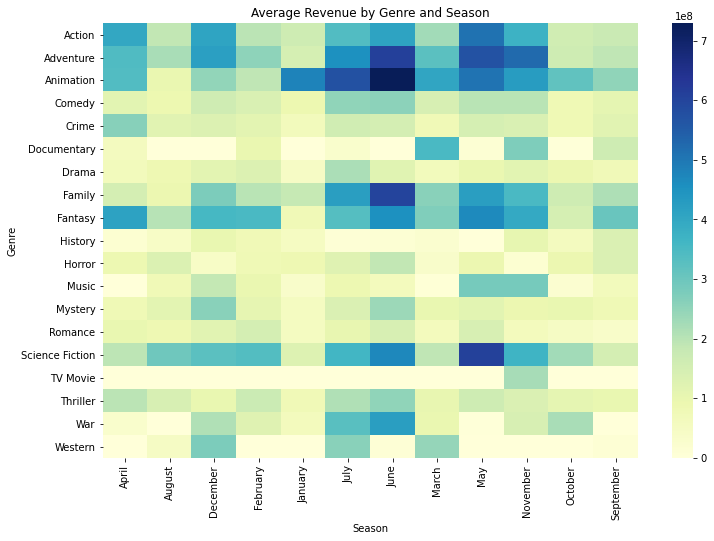

In [65]:
# Heatmap of average revenue by genre and season
plt.figure(figsize=(12, 8))
sns.heatmap(genre_by_month,  cmap='YlGnBu')
plt.title('Average Revenue by Genre and Season')
plt.xlabel('Season')
plt.ylabel('Genre')
plt.show()

In [66]:
# analysis of studios profits
studio_profits = df_movies.groupby("studio")['profit'].sum().reset_index().sort_values(by=["profit"], ascending=False)
top_10_studios = studio_profits[:10]
top_10_studios

,studio,profit
11,BV,87378387476
63,Uni.,64386981983
22,Fox,63724354744
67,WB,42587311752
57,Sony,39341941688
48,Par.,27867440412
68,WB (NL),15929104855
45,P/DW,13871958951
33,LGF,13396657126
32,LG/S,4981060875


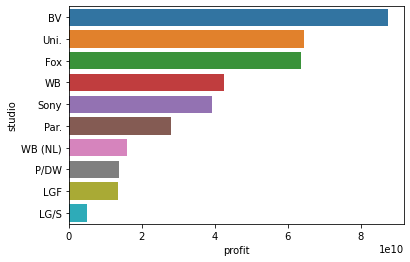

In [67]:
fig, ax = plt.subplots()
sns.barplot(data=top_10_studios, x='profit', y='studio');

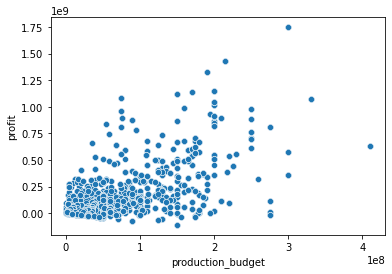

In [68]:
# a simple linear regression model
# check relationship between budgets and profits

sns.scatterplot(data=df_movies, x='production_budget', y="profit");


In [69]:
X = df_movies[['production_budget']]
y = df_movies['profit']

model = sm.OLS(endog=y, exog=sm.add_constant(X))

results = model.fit()

In [70]:
results.fvalue, results.f_pvalue

(1922.018987036257, 1.038e-320)

In [71]:
results.rsquared

0.4049749889931432

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1922.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.04e-320
Time:                        13:03:16   Log-Likelihood:                -57672.
No. Observations:                2826   AIC:                         1.153e+05
Df Residuals:                    2824   BIC:                         1.154e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.374e+05   4.69e+06     -0.157      0.875   -9.92e+06    8.45e+06
production_budget     2.3259      0.053     43.841      0.000       2.222       2.430
==============================================================================
Omnibus:                     1067.856   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7376.696
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                      10.217   Cond. No.                     1.25e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""